<a href="https://colab.research.google.com/github/ssubin29/KaggleStruggle/blob/main/DigitRecognizer_useClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle API 연동

In [ ]:
# API Token 다운받기
# 다운받은 API Token 업로드 하기
!pip install kaggle
from google.colab import files
files.upload()
# json 파일 옮겨주기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle

Saving kaggle.json to kaggle (1).json


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 필요한 모듈 임포트 & 데이터 불러오기

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig_dims = (20,10)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [ ]:
DATA_IN = '/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/'
import os
for dirname, _, filenames in os.walk(DATA_IN):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_data = pd.read_csv(DATA_IN+"/train.csv")
test_data = pd.read_csv(DATA_IN+"/test.csv")

/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/train.csv
/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/test.csv
/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/sample_submission.csv
/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/test.csv.zip
/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/train.csv.zip


## 데이터 확인하기

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
X = np.array(train_data.drop("label", axis=1)).astype('float32')
y = np.array(train_data['label']).astype('int64')

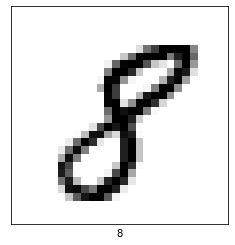

In [ ]:
some_digit=X[30]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap='binary')
plt.xlabel(y[30])
plt.xticks([])
plt.yticks([])
plt.show()

## Classification Model - K-Nearest Neighbors Classifier

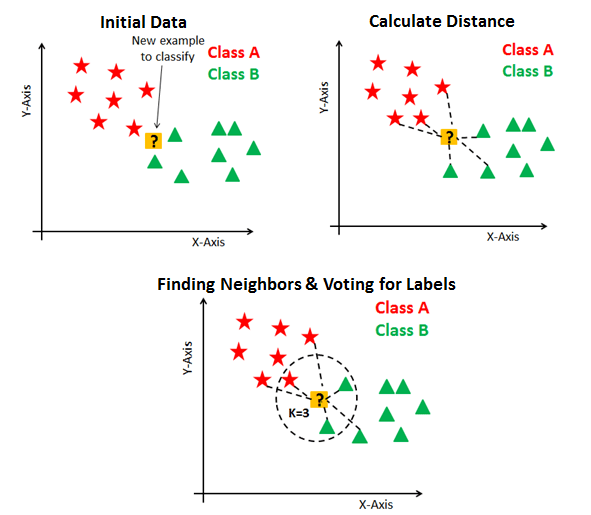

In [ ]:
train_x,val_x,train_y,val_y = train_test_split(X,y,random_state=32)

model = KNeighborsClassifier (n_neighbors=9,weights = 'distance')
model.fit(train_x,train_y)
submission = pd.read_csv(DATA_IN+'/sample_submission.csv')
test = test_data/255.0 #Remember the normalize the test data like we did for the training data
test = model.predict(test_data)

NameError: ignored

In [ ]:
submission['Label'] = test
submission.to_csv('submission.csv',index=False)
print(submission)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


In [ ]:
submission.to_csv('submission.csv', header=True,index=False)
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "use k-means classifier"

100% 208k/208k [00:03<00:00, 59.5kB/s]
Successfully submitted to Digit Recognizer

## Classification Model - XGBoost Classifier

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(train_x,train_y)
submission = xgboost.predict(test_data)
score = accuracy_score(preds,val_y)*100
print('Error: ',score)
submission.to_csv('submission.csv', header=True,index=False)
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "use XGBoost classifier"

ValueError: ignored